# Example usage with MNIST data set

A very simple example showing how easy it is to use the neural net with MNIST data.

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from netz.neuralnet import NeuralNet
from netz.layers import InputLayer
from netz.layers import DenseLayer
from netz.layers import OutputLayer

Using gpu device 0: GeForce GT 630M


## Load data

In [4]:
path_to_mnist = '/media/vinh/Volume/work/kaggle/mnist/train.csv'

In [5]:
df = pd.read_csv(path_to_mnist)

## Prepare data

In [6]:
data = df.values

In [7]:
np.random.shuffle(data)

In [8]:
labels = data[:, 0]

In [9]:
encoder = OneHotEncoder(sparse=False)

In [10]:
y = encoder.fit_transform(labels.reshape(-1, 1))

In [11]:
X = data[:, 1:].astype(float)

### normalize

In [12]:
X = (X - X.mean(1).reshape(-1, 1)) / X.std(1).reshape(-1, 1)

In [13]:
train_size = int(0.8 * X.shape[0])

In [14]:
X_train, X_valid = X[:train_size], X[train_size:]

In [15]:
y_train, y_valid = y[:train_size], y[train_size:]

## Example data

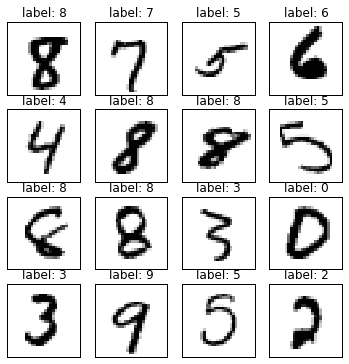

In [16]:
figs, axes = plt.subplots(4, 4, figsize=(6, 6))
for i in range(4):
    for j in range(4):
        axes[i, j].imshow(1 - X_train[i + 4 * j].reshape(28, 28),
                          cmap='gray', interpolation='nearest')
        axes[i, j].set_title('label: ' + str(labels[i + 4 * j]))
        axes[i, j].set_yticks([])
        axes[i, j].set_xticks([])

## Train model

### Initialize layers

In [17]:
layers = [InputLayer(),
          DenseLayer(500),
          OutputLayer()]

### Initialize neural net

In [18]:
net = NeuralNet(layers)

### Fit net

In [19]:
net.fit(X_train, y_train, max_iter=25, batchsize=128)

NeuralNet(cost_function=<function crossentropy at 0x7f1c8e9390c8>,
     layers=[<netz.layers.InputLayer object at 0x7f1c97e848d0>, <netz.layers.DenseLayer object at 0x7f1c8e94d150>, <netz.layers.OutputLayer object at 0x7f1c8e94d110>],
     update=<class 'netz.updaters.SGD'>,
     update_kwargs={'learn_rate': <TensorType(float64, scalar)>})

### Visualize progress

In [20]:
len(net.cost_history_)

25

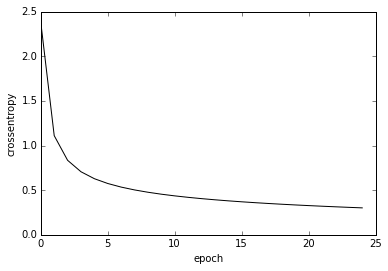

In [21]:
plt.plot(net.cost_history_, 'k')
plt.xlabel('epoch')
plt.ylabel('crossentropy')

## Validation

In [22]:
y_prob = net.predict(X_valid)

In [23]:
predicted_labels = np.argmax(y_prob, axis=1)

In [24]:
true_labels = labels[train_size:]

In [25]:
accuracy = np.mean(true_labels == predicted_labels)

In [26]:
print("Accuracy on validation set: {:.3f} %".format(100 * accuracy))

Accuracy on validation set: 90.071 %
